 # NBA Salary Prediction Project
 
 The NBA is (almost) always fun to watch. I've been a basketball fan ever since 2012 when Linsanity was a big deal, and to this day I follow the NBA and all of its drama, even when recently things have been pretty boring because of the Warriors. (As of 6/5/19, I really hope the Raptors destroy them!) One matter that I was always curious about is the matter of salary. There are some superstars who get paid a crazy amount, even when some of them don't really earn it in terms of performance. On the other end of the spectrum some people make peanuts yet absolutely destroy expectations. What are the factors that truly determine how much an NBA player is paid? 

In this project we will find out.

## Importing Data
For my data, I've found a large number of sets that I feel will provide me with good analysis fodder, some data that will make it easy to determine the best model to estimate what parameters matter the most in calculating an NBA player's salary. 



For the sake of my data exploration and analysis, I need to import the library pandas.

Here I will use pandas to read all of the csv files.

I'm reading these files directly from my GitHub repository, which is why I have the variable 'urls'.

In [0]:
import pandas as pd

urls = ['https://raw.githubusercontent.com/jerrytigerxu/NBA-Salary-Prediction/master/data/Seasons_Stats.csv', 'https://raw.githubusercontent.com/jerrytigerxu/NBA-Salary-Prediction/master/data/1990_to_2018.csv', 'https://raw.githubusercontent.com/jerrytigerxu/NBA-Salary-Prediction/master/data/NBA%20Season%20Data.csv']

data = {} # I'm creating a dictionary where all of my data can be stored in one place

for f in urls:
  d = pd.read_csv(f)
  data[f.replace('.csv', '')[81:].replace('%20', '_')] = d
  

In [3]:
data.keys()

dict_keys(['Seasons_Stats', '1990_to_2018', 'NBA_Season_Data'])

Now let's take a look at the data we have so far.

In [4]:
for file in data:
  print(file)
  data[file].info()
  print('\n')

Seasons_Stats
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 53 columns):
Unnamed: 0    24691 non-null int64
Year          24624 non-null float64
Player        24624 non-null object
Pos           24624 non-null object
Age           24616 non-null float64
Tm            24624 non-null object
G             24624 non-null float64
GS            18233 non-null float64
MP            24138 non-null float64
PER           24101 non-null float64
TS%           24538 non-null float64
3PAr          18839 non-null float64
FTr           24525 non-null float64
ORB%          20792 non-null float64
DRB%          20792 non-null float64
TRB%          21571 non-null float64
AST%          22555 non-null float64
STL%          20792 non-null float64
BLK%          20792 non-null float64
TOV%          19582 non-null float64
USG%          19640 non-null float64
blanl         0 non-null float64
OWS           24585 non-null float64
DWS           24585 non-null float6

## Data Cleaning

Currently we have three dataframes to deal with, so I'll start with the 'Seasons_Stats' dataframe.

In [0]:
# Have to remove the first column of the dataframe

data['Seasons_Stats'] = data['Seasons_Stats'].drop(data['Seasons_Stats'].columns[0], axis=1)



In [6]:
data['Seasons_Stats'].head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


Taking a look at the head of the 'Seasons_Stats' data, I need to also deal with the data type of 'year' as well as figure out what to do with the lack of advanced data for the players from ye olden days.

In [7]:
data['Seasons_Stats']['Year'].head()
data['Seasons_Stats']['Year'].isnull().values.any()
#data['Seasons_Stats']['Year'] = data['Seasons_Stats']['Year'].astype('int64')

True

Looks like there are some NaN values in the year column.

In [8]:
data['Seasons_Stats']['Year'].isnull().sum()

data['Seasons_Stats'][data['Seasons_Stats']['Year'].isnull() == True]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I've found the rows where the 'year' column is NaN, and it appears that in those rows every single column is also NaN, which makes our lives a bit easier because we can just delete those directly.

In [0]:
data['Seasons_Stats'] = data['Seasons_Stats'].dropna(subset=['Year'])

In [10]:
data['Seasons_Stats']['Year'].isnull().sum()

# Nice! No more pesky NaN values in the 'year' column!

0

In [0]:
data['Seasons_Stats']['Year'] = data['Seasons_Stats']['Year'].astype('int64')

# Now I can convert the years into integers

In [12]:
data['Seasons_Stats'].head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


Because of the error that can come about through inflation and time-related issues, I need to cut down on the scope of this dataframe. First, I'll take the subset of player stats that is 1980 or later. Why? Because the 3-point line was first added between 1979 and 1980, thus, a lot of advanced stats would not have existed beforehand. 

Because I am cutting out nearly 30 years of NBA history, this NBA salary prediction algorithm would only make sense for 1980 and later. (Which is fine because that's when basketball actually started to be entertaining)

In [13]:
data['Seasons_Stats'] = data['Seasons_Stats'][data['Seasons_Stats']['Year'] > 1980]

data['Seasons_Stats'].head()


,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
6085,1981,Kareem Abdul-Jabbar*,C,33.0,LAL,80.0,NaN,2976.0,25.5,0.616,0.001,0.379,7.6,21.5,15.0,13.6,0.9,4.0,12.8,26.3,NaN,9.6,4.6,14.3,0.230,NaN,3.9,1.4,5.3,5.4,836.0,1457.0,0.574,0.0,1.0,0.0,836.0,1456.0,0.574,0.574,423.0,552.0,0.766,197.0,624.0,821.0,272.0,59.0,228.0,249.0,244.0,2095.0
6086,1981,Tom Abernethy,SF,26.0,TOT,39.0,NaN,298.0,8.0,0.459,0.017,0.373,7.1,10.6,8.8,8.0,1.1,0.6,10.4,10.3,NaN,0.2,0.2,0.4,0.062,NaN,-2.6,-0.7,-3.2,-0.1,25.0,59.0,0.424,0.0,1.0,0.0,25.0,58.0,0.431,0.424,13.0,22.0,0.591,20.0,28.0,48.0,19.0,7.0,3.0,8.0,34.0,63.0
6087,1981,Tom Abernethy,SF,26.0,GSW,10.0,NaN,39.0,3.2,0.463,0.000,1.000,2.8,20.2,11.4,2.9,1.2,0.0,31.6,6.4,NaN,0.0,0.0,0.0,-0.004,NaN,-6.0,-0.2,-6.2,0.0,1.0,3.0,0.333,0.0,0.0,NaN,1.0,3.0,0.333,0.333,2.0,3.0,0.667,1.0,7.0,8.0,1.0,1.0,0.0,2.0,5.0,4.0
6088,1981,Tom Abernethy,SF,26.0,IND,29.0,NaN,259.0,8.7,0.458,0.018,0.339,7.8,9.1,8.4,8.8,1.1,0.7,8.5,10.9,NaN,0.2,0.2,0.4,0.072,NaN,-2.0,-0.8,-2.8,-0.1,24.0,56.0,0.429,0.0,1.0,0.0,24.0,55.0,0.436,0.429,11.0,19.0,0.579,19.0,21.0,40.0,18.0,6.0,3.0,6.0,29.0,59.0
6089,1981,Alvan Adams,C,26.0,PHO,75.0,NaN,2054.0,20.3,0.567,0.000,0.298,8.6,20.5,14.7,24.5,2.4,1.9,18.7,23.0,NaN,3.3,4.5,7.7,0.180,NaN,2.0,3.3,5.3,3.8,458.0,870.0,0.526,0.0,0.0,NaN,458.0,870.0,0.526,0.526,199.0,259.0,0.768,157.0,389.0,546.0,344.0,106.0,69.0,226.0,226.0,1115.0


Let's get rid of some columns that either don't make sense or aren't important.

In [14]:
data['Seasons_Stats'] = data['Seasons_Stats'].drop(['GS', 'blanl', 'blank2'], axis=1)
data['Seasons_Stats'].head()


,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
6085,1981,Kareem Abdul-Jabbar*,C,33.0,LAL,80.0,2976.0,25.5,0.616,0.001,0.379,7.6,21.5,15.0,13.6,0.9,4.0,12.8,26.3,9.6,4.6,14.3,0.230,3.9,1.4,5.3,5.4,836.0,1457.0,0.574,0.0,1.0,0.0,836.0,1456.0,0.574,0.574,423.0,552.0,0.766,197.0,624.0,821.0,272.0,59.0,228.0,249.0,244.0,2095.0
6086,1981,Tom Abernethy,SF,26.0,TOT,39.0,298.0,8.0,0.459,0.017,0.373,7.1,10.6,8.8,8.0,1.1,0.6,10.4,10.3,0.2,0.2,0.4,0.062,-2.6,-0.7,-3.2,-0.1,25.0,59.0,0.424,0.0,1.0,0.0,25.0,58.0,0.431,0.424,13.0,22.0,0.591,20.0,28.0,48.0,19.0,7.0,3.0,8.0,34.0,63.0
6087,1981,Tom Abernethy,SF,26.0,GSW,10.0,39.0,3.2,0.463,0.000,1.000,2.8,20.2,11.4,2.9,1.2,0.0,31.6,6.4,0.0,0.0,0.0,-0.004,-6.0,-0.2,-6.2,0.0,1.0,3.0,0.333,0.0,0.0,NaN,1.0,3.0,0.333,0.333,2.0,3.0,0.667,1.0,7.0,8.0,1.0,1.0,0.0,2.0,5.0,4.0
6088,1981,Tom Abernethy,SF,26.0,IND,29.0,259.0,8.7,0.458,0.018,0.339,7.8,9.1,8.4,8.8,1.1,0.7,8.5,10.9,0.2,0.2,0.4,0.072,-2.0,-0.8,-2.8,-0.1,24.0,56.0,0.429,0.0,1.0,0.0,24.0,55.0,0.436,0.429,11.0,19.0,0.579,19.0,21.0,40.0,18.0,6.0,3.0,6.0,29.0,59.0
6089,1981,Alvan Adams,C,26.0,PHO,75.0,2054.0,20.3,0.567,0.000,0.298,8.6,20.5,14.7,24.5,2.4,1.9,18.7,23.0,3.3,4.5,7.7,0.180,2.0,3.3,5.3,3.8,458.0,870.0,0.526,0.0,0.0,NaN,458.0,870.0,0.526,0.526,199.0,259.0,0.768,157.0,389.0,546.0,344.0,106.0,69.0,226.0,226.0,1115.0


Now might be a good time to learn what the column names actually mean. Some of these abbreviations are difficult to decipher so I'll figure that out now.

In [15]:
data['Seasons_Stats'].columns

Index(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

Here are the meanings of the statistics:



*   'Pos' - position
*   'Tm' - team
*   'G' - games played
*   'MP' - minutes played
*   'PER' - player efficiency rating
*   'TS%' - true shooting percentage (weights 3-pointers higher)
*   '3PAr' - 3-point attempt rate
*   'Ftr' - free throw attempt rate
*   'ORB%' - offensive rebound percentage
*   'DRB%' - defensive rebound percentage
*   'TRB%' - total rebound percentage
*   'AST%' - assist percentage
*   'STL%' - steal percentage
*   'BLK%' - block percentage
*   'TOV%' - turnover percentage
*   'USG%' - usage rate
*   'OWS' - offensive win shares
*   'DWS' - defensive win shares
*   'WS' - win shares
*   'WS/48' - win shares over 48 minutes
*   'OBPM' - offensive box plus/minus
*   'DBPM' - defensive box plus/minus
*   'BPM' - box plus/minus
*   'VORP' - value over replacement player
*   'FG' - field goals made
*   'FGA' - field goals attempted
*   'FG%' - field goal percentage'
*   '3P' - 3-pointers made
*   '3PA' - 3-pointers attempted
*   '3P%' - 3-point percentage
*   '2P' - 2-pointers made
*   '2PA' - 2-pointers attempted
*   '2P%' - 2-point percentage'
*   'eFG%' - effective field goal percentage
*   'FT' - free throws made
*   'FTA' - free throws attempted
*   'FT%' - free throw percentage
*   'ORB' - offensive rebounds
*   'DRB' - defensive rebounds
*   'TRB' - total rebounds
*   'AST' - assists
*   'STL' - steals
*   'BLK' - blocks
*   'TOV' - turnovers
*   'PF' - personal fouls
*   'PTS' - points













































Before I can clean up other datasets and eventually join a few to make a big dataframe, I need to make sure that there are no more annoying NaN values lurking in the data

In [16]:
data['Seasons_Stats'].count()

# The total number of rows is 18570, but some of the columns are missing values. To simplify everything, I'm just going to turn those missing values to the value of zero.

Year      18570
Player    18570
Pos       18570
Age       18570
Tm        18570
G         18570
MP        18570
PER       18565
TS%       18494
3PAr      18483
FTr       18483
ORB%      18565
DRB%      18565
TRB%      18565
AST%      18565
STL%      18565
BLK%      18565
TOV%      18509
USG%      18565
OWS       18570
DWS       18570
WS        18570
WS/48     18565
OBPM      18570
DBPM      18570
BPM       18570
VORP      18570
FG        18570
FGA       18570
FG%       18483
3P        18570
3PA       18570
3P%       15143
2P        18570
2PA       18570
2P%       18454
eFG%      18483
FT        18570
FTA       18570
FT%       17828
ORB       18570
DRB       18570
TRB       18570
AST       18570
STL       18570
BLK       18570
TOV       18570
PF        18570
PTS       18570
dtype: int64

In [0]:
data['Seasons_Stats'] = data['Seasons_Stats'].fillna(0)


In [18]:
data['Seasons_Stats'].count()

# That's much better.

Year      18570
Player    18570
Pos       18570
Age       18570
Tm        18570
G         18570
MP        18570
PER       18570
TS%       18570
3PAr      18570
FTr       18570
ORB%      18570
DRB%      18570
TRB%      18570
AST%      18570
STL%      18570
BLK%      18570
TOV%      18570
USG%      18570
OWS       18570
DWS       18570
WS        18570
WS/48     18570
OBPM      18570
DBPM      18570
BPM       18570
VORP      18570
FG        18570
FGA       18570
FG%       18570
3P        18570
3PA       18570
3P%       18570
2P        18570
2PA       18570
2P%       18570
eFG%      18570
FT        18570
FTA       18570
FT%       18570
ORB       18570
DRB       18570
TRB       18570
AST       18570
STL       18570
BLK       18570
TOV       18570
PF        18570
PTS       18570
dtype: int64

## Salary Data

Lesson learned: data preparation and data cleaning are WITHOUT A DOUBT the most tedious and time-consuming part of data science.

After actually looking (briefly) through the datasets, I see that I need to perform some data wizardry with the 1990-2018 dataframe to extract important salary information.

As mentioned earlier, because of the effect of inflation and time-related issues, I can't just put all of the salaries together and then use machine learning algorithms on those. I need a way to standardize all of the data. That's why I decided to create some metrics like: player's salary as proportion of team payroll, team's payroll as proportion of total payroll (market size), player's salary as proportion of total payroll in the NBA.

Time to manipulate some more data.

In [19]:
data['1990_to_2018'].head()

,player,salary,season_end,season_start,team,team_name
0,Moses Malone,2406000,1991,1990,ATL,Atlanta Hawks
1,Dominique Wilkins,2065000,1991,1990,ATL,Atlanta Hawks
2,Jon Koncak,1550000,1991,1990,ATL,Atlanta Hawks
3,Doc Rivers,895000,1991,1990,ATL,Atlanta Hawks
4,Rumeal Robinson,800000,1991,1990,ATL,Atlanta Hawks


In [20]:
data['1990_to_2018'].count()

player          11838
salary          11838
season_end      11838
season_start    11838
team            11838
team_name       11838
dtype: int64

It took me a while, but I managed to create some new features based on this dataset, including: team payroll, total NBA payroll, and year.

At first I just downloaded the file into Excel and did some Excel formulas to generate the values, but that was too inefficient, so I created a robust Python script that automated the task VERY quickly.

Here is the [notebook](https://colab.research.google.com/drive/1SV3Q8RLvyQvobya2SVshq9_D4qYUForU) on which I did this.

Now it's time to bring in the new and improved salary data.

In [0]:
url = 'https://raw.githubusercontent.com/jerrytigerxu/NBA-Salary-Prediction/master/data/nba_salaries.csv'

data['salaries'] = pd.read_csv(url)

data['salaries'] = data['salaries'].drop(data['salaries'].columns[0], axis=1)

In [22]:
data['salaries'].head()


,Year,Player,Salary,Team,Team Payroll,Total NBA Payroll
0,1991,Moses Malone,2406000,Atlanta Hawks,11761000,293563000
1,1991,Dominique Wilkins,2065000,Atlanta Hawks,11761000,293563000
2,1991,Jon Koncak,1550000,Atlanta Hawks,11761000,293563000
3,1991,Doc Rivers,895000,Atlanta Hawks,11761000,293563000
4,1991,Rumeal Robinson,800000,Atlanta Hawks,11761000,293563000


## Feature Engineering

Now is where the fun really begins! 

Let's make some more features that will aid us in our analysis of what are the most predictors of a high salary.

A few I'll make right off the bat are: 

*   Salary as proportion of team payroll (player leverage)
*   Salary as proportion of total NBA payroll (league weight)
*   Team payroll as proportion of total NBA payroll (team market size)
*   Region of US











In [0]:
# Creating a Player Leverage column

data['salaries']['Player Leverage'] = data['salaries']['Salary'] / data['salaries']['Team Payroll'] 

In [24]:
data['salaries'].head()

,Year,Player,Salary,Team,Team Payroll,Total NBA Payroll,Player Leverage
0,1991,Moses Malone,2406000,Atlanta Hawks,11761000,293563000,0.204574
1,1991,Dominique Wilkins,2065000,Atlanta Hawks,11761000,293563000,0.175580
2,1991,Jon Koncak,1550000,Atlanta Hawks,11761000,293563000,0.131792
3,1991,Doc Rivers,895000,Atlanta Hawks,11761000,293563000,0.076099
4,1991,Rumeal Robinson,800000,Atlanta Hawks,11761000,293563000,0.068021


In [0]:
# Creating a League Weight column
data['salaries']['League Weight'] = data['salaries']['Salary'] / data['salaries']['Total NBA Payroll']

In [26]:
data['salaries'].head()

,Year,Player,Salary,Team,Team Payroll,Total NBA Payroll,Player Leverage,League Weight
0,1991,Moses Malone,2406000,Atlanta Hawks,11761000,293563000,0.204574,0.008196
1,1991,Dominique Wilkins,2065000,Atlanta Hawks,11761000,293563000,0.175580,0.007034
2,1991,Jon Koncak,1550000,Atlanta Hawks,11761000,293563000,0.131792,0.005280
3,1991,Doc Rivers,895000,Atlanta Hawks,11761000,293563000,0.076099,0.003049
4,1991,Rumeal Robinson,800000,Atlanta Hawks,11761000,293563000,0.068021,0.002725


In [0]:
# Creating a Team Market Size column
data['salaries']['Team Market Size'] = data['salaries']['Team Payroll'] / data['salaries']['Total NBA Payroll']

In [28]:
data['salaries'].head(50)

,Year,Player,Salary,Team,Team Payroll,Total NBA Payroll,Player Leverage,League Weight,Team Market Size
0,1991,Moses Malone,2406000,Atlanta Hawks,11761000,293563000,0.204574,0.008196,0.040063
1,1991,Dominique Wilkins,2065000,Atlanta Hawks,11761000,293563000,0.175580,0.007034,0.040063
2,1991,Jon Koncak,1550000,Atlanta Hawks,11761000,293563000,0.131792,0.005280,0.040063
3,1991,Doc Rivers,895000,Atlanta Hawks,11761000,293563000,0.076099,0.003049,0.040063
4,1991,Rumeal Robinson,800000,Atlanta Hawks,11761000,293563000,0.068021,0.002725,0.040063
5,1991,Tim McCormick,775000,Atlanta Hawks,11761000,293563000,0.065896,0.002640,0.040063
6,1991,Kevin Willis,685000,Atlanta Hawks,11761000,293563000,0.058243,0.002333,0.040063
7,1991,Alexander Volkov,650000,Atlanta Hawks,11761000,293563000,0.055267,0.002214,0.040063
8,1991,John Battle,590000,Atlanta Hawks,11761000,293563000,0.050166,0.002010,0.040063
9,1991,Sidney Moncrief,510000,Atlanta Hawks,11761000,293563000,0.043364,0.001737,0.040063


In [29]:
# Just for fun, using the League Weight column, I can quickly pinpoint which player was paid the most in a particular year

highest = data['salaries']['League Weight'] == max(data['salaries'][data['salaries']['Year'] == 1991]['League Weight'])

data['salaries'][highest]['Player']

224    Patrick Ewing
Name: Player, dtype: object

In [30]:
# Let's find the find the highest paid players for every year 

start_year = 1991

for i in range(17):
  highest = data['salaries']['League Weight'] == max(data['salaries'][data['salaries']['Year'] == (1991+i)]['League Weight'])

  print(data['salaries'][highest]['Player'].values)
  

['Patrick Ewing']
['Larry Bird']
['David Robinson']
['David Robinson']
['David Robinson']
['Patrick Ewing']
['Michael Jordan']
['Michael Jordan']
['Patrick Ewing']
["Shaquille O\\'Neal"]
['Kevin Garnett']
['Kevin Garnett']
['Kevin Garnett']
['Kevin Garnett']
["Shaquille O\\'Neal"]
["Shaquille O\\'Neal"]
['Kevin Garnett']


Now let's create the US Region column.

I'll make it simple and divide up the country (as well as Toronto) into four regions based on how the US government does it: Northeast, Midwest, South, and West


**Northeast**: New York, Boston, Brooklyn, Philadelphia, Toronto

**Midwest**: Cleveland, Detroit, Indiana, Milwaukee, Minnesota, Chicago

**South**: Atlanta, Charlotte, Miami, Orlando, New Orleans, Washington, Dallas, Oklahoma City, Houston, San Antonio, Memphis

**West**: Golden State, Denver, Utah, Sacramento, Los Angeles Lakers, Los Angeles Clippers, Phoenix, Portland



In [31]:
data['salaries']['Team'].unique()

array(['Atlanta Hawks', 'Boston Celtic', 'Charlotte Hornets',
       'Chicago Bulls', 'Cleveland Caveliers', 'Dallas Mavericks',
       'Denver Nuggets', 'Detroit Pistons', 'Golden State Warriors',
       'Houston Rockets', 'Indiana Pacers', 'Los Angeles Clippers',
       'Los Angeles Lakers', 'Miami Heat', 'Milwaukee Bucks',
       'Minnesota Timberwolves', 'Brooklyn Nets', 'New York Knicks',
       'Oklahoma City Thunder', 'Orlando Magic', 'Philadelphia 76ers',
       'Phoenix Suns', 'Portland Trail Blazers', 'Sacramento Kings',
       'San Antonio Spurs', 'Utah Jazz', 'Washington Wizards',
       'Memphis Grizzlies', 'Toronto Raptors', 'New Orleans Pelicans'],
      dtype=object)

In [0]:
data['salaries']['US Region'] = 0

# Dummy entry

In [33]:
data['salaries'].head()

,Year,Player,Salary,Team,Team Payroll,Total NBA Payroll,Player Leverage,League Weight,Team Market Size,US Region
0,1991,Moses Malone,2406000,Atlanta Hawks,11761000,293563000,0.204574,0.008196,0.040063,0
1,1991,Dominique Wilkins,2065000,Atlanta Hawks,11761000,293563000,0.175580,0.007034,0.040063,0
2,1991,Jon Koncak,1550000,Atlanta Hawks,11761000,293563000,0.131792,0.005280,0.040063,0
3,1991,Doc Rivers,895000,Atlanta Hawks,11761000,293563000,0.076099,0.003049,0.040063,0
4,1991,Rumeal Robinson,800000,Atlanta Hawks,11761000,293563000,0.068021,0.002725,0.040063,0


In [0]:
for rowNum in range(len(data['salaries'].index.values)):
  if data['salaries'].iloc[rowNum]['Team'] in ['New York Knicks', 'Boston Celtic', 'Brooklyn Nets', 'Philadelphia 76ers', 'Toronto Raptors']:
    data['salaries'].loc[rowNum, 'US Region'] = 'Northeast'
  elif data['salaries'].iloc[rowNum]['Team'] in ['Cleveland Caveliers', 'Detroit Pistons', 'Indiana Pacers', 'Milwaukee Bucks', 'Minnesota Timberwolves', 'Chicago Bulls']:
    data['salaries'].loc[rowNum, 'US Region'] = 'Midwest'
  elif data['salaries'].iloc[rowNum]['Team'] in ['Atlanta Hawks', 'Charlotte Hornets', 'Miami Heat', 'Orlando Magic', 'New Orleans Pelicans', 'Washington Wizards', 'Dallas Mavericks', 'Oklahoma City Thunder', 'Houston Rockets', 'San Antonio Spurs', 'Memphis Grizzlies']:
    data['salaries'].loc[rowNum, 'US Region'] = 'South'
  elif data['salaries'].iloc[rowNum]['Team'] in ['Golden State Warriors', 'Denver Nuggets', 'Utah Jazz', 'Sacramento Kings', 'Los Angeles Lakers', 'Los Angeles Clippers', 'Phoenix Suns', 'Portland Trail Blazers']:
    data['salaries'].loc[rowNum, 'US Region'] = 'West'

In [35]:
data['salaries'].head(100)

,Year,Player,Salary,Team,Team Payroll,Total NBA Payroll,Player Leverage,League Weight,Team Market Size,US Region
0,1991,Moses Malone,2406000,Atlanta Hawks,11761000,293563000,0.204574,0.008196,0.040063,South
1,1991,Dominique Wilkins,2065000,Atlanta Hawks,11761000,293563000,0.175580,0.007034,0.040063,South
2,1991,Jon Koncak,1550000,Atlanta Hawks,11761000,293563000,0.131792,0.005280,0.040063,South
3,1991,Doc Rivers,895000,Atlanta Hawks,11761000,293563000,0.076099,0.003049,0.040063,South
4,1991,Rumeal Robinson,800000,Atlanta Hawks,11761000,293563000,0.068021,0.002725,0.040063,South
5,1991,Tim McCormick,775000,Atlanta Hawks,11761000,293563000,0.065896,0.002640,0.040063,South
6,1991,Kevin Willis,685000,Atlanta Hawks,11761000,293563000,0.058243,0.002333,0.040063,South
7,1991,Alexander Volkov,650000,Atlanta Hawks,11761000,293563000,0.055267,0.002214,0.040063,South
8,1991,John Battle,590000,Atlanta Hawks,11761000,293563000,0.050166,0.002010,0.040063,South
9,1991,Sidney Moncrief,510000,Atlanta Hawks,11761000,293563000,0.043364,0.001737,0.040063,South


## Merging Datasets

Now it's time to put together the two datasets that we've spent a lot of time working on!

Because the salary data starts in the 90s, I'm going to have to cut off another decade off of my 'Seasons_Stats' dataframe. This might hurt some of the analysis because it only encompasses the modern era of the NBA, but because of the proportion features I've created, much of the effect of time should (hopefully) be mitigated.

In [0]:
data['player_stats'] = pd.merge(data['Seasons_Stats'], data['salaries'], how='left', left_on=['Year', 'Player'], right_on=['Year', 'Player'])

In [37]:
data['player_stats'].head()

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary,Team,Team Payroll,Total NBA Payroll,Player Leverage,League Weight,Team Market Size,US Region
0,1981,Kareem Abdul-Jabbar*,C,33.0,LAL,80.0,2976.0,25.5,0.616,0.001,0.379,7.6,21.5,15.0,13.6,0.9,4.0,12.8,26.3,9.6,4.6,14.3,0.230,3.9,1.4,5.3,5.4,836.0,1457.0,0.574,0.0,1.0,0.0,836.0,1456.0,0.574,0.574,423.0,552.0,0.766,197.0,624.0,821.0,272.0,59.0,228.0,249.0,244.0,2095.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1981,Tom Abernethy,SF,26.0,TOT,39.0,298.0,8.0,0.459,0.017,0.373,7.1,10.6,8.8,8.0,1.1,0.6,10.4,10.3,0.2,0.2,0.4,0.062,-2.6,-0.7,-3.2,-0.1,25.0,59.0,0.424,0.0,1.0,0.0,25.0,58.0,0.431,0.424,13.0,22.0,0.591,20.0,28.0,48.0,19.0,7.0,3.0,8.0,34.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1981,Tom Abernethy,SF,26.0,GSW,10.0,39.0,3.2,0.463,0.000,1.000,2.8,20.2,11.4,2.9,1.2,0.0,31.6,6.4,0.0,0.0,0.0,-0.004,-6.0,-0.2,-6.2,0.0,1.0,3.0,0.333,0.0,0.0,0.0,1.0,3.0,0.333,0.333,2.0,3.0,0.667,1.0,7.0,8.0,1.0,1.0,0.0,2.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1981,Tom Abernethy,SF,26.0,IND,29.0,259.0,8.7,0.458,0.018,0.339,7.8,9.1,8.4,8.8,1.1,0.7,8.5,10.9,0.2,0.2,0.4,0.072,-2.0,-0.8,-2.8,-0.1,24.0,56.0,0.429,0.0,1.0,0.0,24.0,55.0,0.436,0.429,11.0,19.0,0.579,19.0,21.0,40.0,18.0,6.0,3.0,6.0,29.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1981,Alvan Adams,C,26.0,PHO,75.0,2054.0,20.3,0.567,0.000,0.298,8.6,20.5,14.7,24.5,2.4,1.9,18.7,23.0,3.3,4.5,7.7,0.180,2.0,3.3,5.3,3.8,458.0,870.0,0.526,0.0,0.0,0.0,458.0,870.0,0.526,0.526,199.0,259.0,0.768,157.0,389.0,546.0,344.0,106.0,69.0,226.0,226.0,1115.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
data['player_stats'] = data['player_stats'][data['player_stats']['Year'] > 1990]

In [39]:
data['player_stats'].head(200)

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary,Team,Team Payroll,Total NBA Payroll,Player Leverage,League Weight,Team Market Size,US Region
3912,1991,Alaa Abdelnaby,PF,22.0,POR,43.0,290.0,13.1,0.499,0.000,0.379,10.4,23.4,17.0,5.8,0.7,2.5,14.0,22.1,0.0,0.5,0.5,0.079,-4.2,-0.7,-5.0,-0.2,55.0,116.0,0.474,0.0,0.0,0.000,55.0,116.0,0.474,0.474,25.0,44.0,0.568,27.0,62.0,89.0,12.0,4.0,12.0,22.0,39.0,135.0,395000.0,Portland Trail Blazers,11215000.0,293563000.0,0.035221,0.001346,0.038203,West
3913,1991,Mahmoud Abdul-Rauf,PG,21.0,DEN,67.0,1505.0,12.2,0.448,0.099,0.097,1.9,6.0,3.8,19.2,1.5,0.1,9.5,27.2,-0.7,-0.3,-1.0,-0.031,-1.7,-4.4,-6.1,-1.6,417.0,1009.0,0.413,24.0,100.0,0.240,393.0,909.0,0.432,0.425,84.0,98.0,0.857,34.0,87.0,121.0,206.0,55.0,4.0,110.0,149.0,942.0,1660000.0,Denver Nuggets,10335000.0,293563000.0,0.160619,0.005655,0.035205,West
3914,1991,Mark Acres,C,28.0,ORL,68.0,1313.0,9.2,0.551,0.014,0.472,11.3,18.7,14.9,2.5,0.9,1.1,14.0,9.3,1.4,1.1,2.5,0.090,-2.1,0.3,-1.8,0.1,109.0,214.0,0.509,1.0,3.0,0.333,108.0,211.0,0.512,0.512,66.0,101.0,0.653,140.0,219.0,359.0,25.0,25.0,25.0,42.0,218.0,285.0,437000.0,Orlando Magic,7532000.0,293563000.0,0.058019,0.001489,0.025657,South
3915,1991,Michael Adams,PG,28.0,DEN,66.0,2346.0,22.3,0.530,0.397,0.372,2.1,8.8,5.2,39.4,2.6,0.1,12.7,28.5,5.8,0.4,6.3,0.128,7.1,-2.7,4.4,3.8,560.0,1421.0,0.394,167.0,564.0,0.296,393.0,857.0,0.459,0.453,465.0,529.0,0.879,58.0,198.0,256.0,693.0,147.0,6.0,240.0,162.0,1752.0,825000.0,Denver Nuggets,10335000.0,293563000.0,0.079826,0.002810,0.035205,West
3916,1991,Mark Aguirre,SF,31.0,DET,78.0,2006.0,16.7,0.526,0.086,0.349,7.6,13.7,10.7,11.6,1.2,0.6,10.9,25.7,2.8,2.7,5.5,0.132,0.9,-0.3,0.7,1.4,420.0,909.0,0.462,24.0,78.0,0.308,396.0,831.0,0.477,0.475,240.0,317.0,0.757,134.0,240.0,374.0,139.0,47.0,20.0,128.0,209.0,1104.0,1115000.0,Detroit Pistons,12910000.0,293563000.0,0.086367,0.003798,0.043977,Midwest
3917,1991,Danny Ainge,SG,31.0,POR,80.0,1710.0,17.0,0.574,0.352,0.193,2.9,10.2,6.6,23.8,1.8,0.5,11.4,20.8,4.1,2.1,6.2,0.175,3.4,-0.6,2.8,2.1,337.0,714.0,0.472,102.0,251.0,0.406,235.0,463.0,0.508,0.543,114.0,138.0,0.826,45.0,160.0,205.0,285.0,63.0,13.0,100.0,195.0,890.0,725000.0,Portland Trail Blazers,11215000.0,293563000.0,0.064646,0.002470,0.038203,West
3918,1991,Mark Alarie,PF,27.0,WSB,42.0,587.0,11.3,0.496,0.093,0.213,7.6,14.2,10.9,11.2,1.3,0.8,14.0,20.3,0.1,0.6,0.6,0.050,-2.4,-1.1,-3.6,-0.2,99.0,225.0,0.440,5.0,21.0,0.238,94.0,204.0,0.461,0.451,41.0,48.0,0.854,41.0,76.0,117.0,45.0,15.0,8.0,40.0,88.0,244.0,500000.0,Washington Wizards,9610000.0,293563000.0,0.052029,0.001703,0.032736,South
3919,1991,Steve Alford,PG,26.0,DAL,34.0,236.0,20.5,0.578,0.197,0.265,4.8,6.8,5.8,16.4,1.7,0.3,10.9,27.5,0.5,0.1,0.6,0.121,2.4,-3.8,-1.4,0.0,59.0,117.0,0.504,7.0,23.0,0.304,52.0,94.0,0.553,0.534,26.0,31.0,0.839,10.0,14.0,24.0,22.0,8.0,1.0,16.0,11.0,151.0,250000.0,Dallas Mavericks,11693000.0,293563000.0,0.021380,0.000852,0.039831,South
3920,1991,Greg Anderson,PF,26.0,TOT,68.0,924.0,9.1,0.455,0.004,0.426,10.0,25.9,17.3,2.1,1.7,2.7,20.8,16.3,-1.2,0.9,-0.3,-0.017,-6.8,-0.8,-7.5,-1.3,116.0,270.0,0.430,0.0,1.0,0.000,116.0,269.0,0.431,0.430,60.0,115.0,0.522,97.0,221.0,318.0,16.0,35.0,45.0,84.0,140.0,292.0,1365000.0,Denver Nuggets,10335000.0,293563000.0,0.132075,0.004650,0.035205,West
3921,1991,Greg Anderson,PF,26.0,MIL,26.0,247.0,7.5,0.410,0.014,0.384,12.3,24.1,18.1,1.7,1.6,2.3,20.5,18.6,-0.5,0.4,-0.1,-0.027,-7.8,-1.3,-9.1,-0.4,27.0,73.0,0.370,0.0,1.0,0.000,27.0,72.0,0.375,0.370,16.0,28.0,0.571,26.0,49.0,75.0,3.0,8.0,9.0,22.0,29.0,70.0,1365000.0,Denver Nuggets,10335000.0,293563000.0,0.132075,0.004650,0.035205,West


Very nice! 

There are a few rows where the 'salaries' data didn't contain the players listed in the 'Seasons_Stats' dataframe, so for the sake of simplicity (because those players probably weren't that big of a deal anyways) I'll just get rid of those rows

In [0]:
data['player_stats'] = data['player_stats'].dropna()

In [41]:
data['player_stats'].count()

# No NA values!

Year                 12730
Player               12730
Pos                  12730
Age                  12730
Tm                   12730
G                    12730
MP                   12730
PER                  12730
TS%                  12730
3PAr                 12730
FTr                  12730
ORB%                 12730
DRB%                 12730
TRB%                 12730
AST%                 12730
STL%                 12730
BLK%                 12730
TOV%                 12730
USG%                 12730
OWS                  12730
DWS                  12730
WS                   12730
WS/48                12730
OBPM                 12730
DBPM                 12730
BPM                  12730
VORP                 12730
FG                   12730
FGA                  12730
FG%                  12730
3P                   12730
3PA                  12730
3P%                  12730
2P                   12730
2PA                  12730
2P%                  12730
eFG%                 12730
F

In [42]:
data['player_stats'].head(500)

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary,Team,Team Payroll,Total NBA Payroll,Player Leverage,League Weight,Team Market Size,US Region
3912,1991,Alaa Abdelnaby,PF,22.0,POR,43.0,290.0,13.1,0.499,0.000,0.379,10.4,23.4,17.0,5.8,0.7,2.5,14.0,22.1,0.0,0.5,0.5,0.079,-4.2,-0.7,-5.0,-0.2,55.0,116.0,0.474,0.0,0.0,0.000,55.0,116.0,0.474,0.474,25.0,44.0,0.568,27.0,62.0,89.0,12.0,4.0,12.0,22.0,39.0,135.0,395000.0,Portland Trail Blazers,11215000.0,293563000.0,0.035221,0.001346,0.038203,West
3913,1991,Mahmoud Abdul-Rauf,PG,21.0,DEN,67.0,1505.0,12.2,0.448,0.099,0.097,1.9,6.0,3.8,19.2,1.5,0.1,9.5,27.2,-0.7,-0.3,-1.0,-0.031,-1.7,-4.4,-6.1,-1.6,417.0,1009.0,0.413,24.0,100.0,0.240,393.0,909.0,0.432,0.425,84.0,98.0,0.857,34.0,87.0,121.0,206.0,55.0,4.0,110.0,149.0,942.0,1660000.0,Denver Nuggets,10335000.0,293563000.0,0.160619,0.005655,0.035205,West
3914,1991,Mark Acres,C,28.0,ORL,68.0,1313.0,9.2,0.551,0.014,0.472,11.3,18.7,14.9,2.5,0.9,1.1,14.0,9.3,1.4,1.1,2.5,0.090,-2.1,0.3,-1.8,0.1,109.0,214.0,0.509,1.0,3.0,0.333,108.0,211.0,0.512,0.512,66.0,101.0,0.653,140.0,219.0,359.0,25.0,25.0,25.0,42.0,218.0,285.0,437000.0,Orlando Magic,7532000.0,293563000.0,0.058019,0.001489,0.025657,South
3915,1991,Michael Adams,PG,28.0,DEN,66.0,2346.0,22.3,0.530,0.397,0.372,2.1,8.8,5.2,39.4,2.6,0.1,12.7,28.5,5.8,0.4,6.3,0.128,7.1,-2.7,4.4,3.8,560.0,1421.0,0.394,167.0,564.0,0.296,393.0,857.0,0.459,0.453,465.0,529.0,0.879,58.0,198.0,256.0,693.0,147.0,6.0,240.0,162.0,1752.0,825000.0,Denver Nuggets,10335000.0,293563000.0,0.079826,0.002810,0.035205,West
3916,1991,Mark Aguirre,SF,31.0,DET,78.0,2006.0,16.7,0.526,0.086,0.349,7.6,13.7,10.7,11.6,1.2,0.6,10.9,25.7,2.8,2.7,5.5,0.132,0.9,-0.3,0.7,1.4,420.0,909.0,0.462,24.0,78.0,0.308,396.0,831.0,0.477,0.475,240.0,317.0,0.757,134.0,240.0,374.0,139.0,47.0,20.0,128.0,209.0,1104.0,1115000.0,Detroit Pistons,12910000.0,293563000.0,0.086367,0.003798,0.043977,Midwest
3917,1991,Danny Ainge,SG,31.0,POR,80.0,1710.0,17.0,0.574,0.352,0.193,2.9,10.2,6.6,23.8,1.8,0.5,11.4,20.8,4.1,2.1,6.2,0.175,3.4,-0.6,2.8,2.1,337.0,714.0,0.472,102.0,251.0,0.406,235.0,463.0,0.508,0.543,114.0,138.0,0.826,45.0,160.0,205.0,285.0,63.0,13.0,100.0,195.0,890.0,725000.0,Portland Trail Blazers,11215000.0,293563000.0,0.064646,0.002470,0.038203,West
3918,1991,Mark Alarie,PF,27.0,WSB,42.0,587.0,11.3,0.496,0.093,0.213,7.6,14.2,10.9,11.2,1.3,0.8,14.0,20.3,0.1,0.6,0.6,0.050,-2.4,-1.1,-3.6,-0.2,99.0,225.0,0.440,5.0,21.0,0.238,94.0,204.0,0.461,0.451,41.0,48.0,0.854,41.0,76.0,117.0,45.0,15.0,8.0,40.0,88.0,244.0,500000.0,Washington Wizards,9610000.0,293563000.0,0.052029,0.001703,0.032736,South
3919,1991,Steve Alford,PG,26.0,DAL,34.0,236.0,20.5,0.578,0.197,0.265,4.8,6.8,5.8,16.4,1.7,0.3,10.9,27.5,0.5,0.1,0.6,0.121,2.4,-3.8,-1.4,0.0,59.0,117.0,0.504,7.0,23.0,0.304,52.0,94.0,0.553,0.534,26.0,31.0,0.839,10.0,14.0,24.0,22.0,8.0,1.0,16.0,11.0,151.0,250000.0,Dallas Mavericks,11693000.0,293563000.0,0.021380,0.000852,0.039831,South
3920,1991,Greg Anderson,PF,26.0,TOT,68.0,924.0,9.1,0.455,0.004,0.426,10.0,25.9,17.3,2.1,1.7,2.7,20.8,16.3,-1.2,0.9,-0.3,-0.017,-6.8,-0.8,-7.5,-1.3,116.0,270.0,0.430,0.0,1.0,0.000,116.0,269.0,0.431,0.430,60.0,115.0,0.522,97.0,221.0,318.0,16.0,35.0,45.0,84.0,140.0,292.0,1365000.0,Denver Nuggets,10335000.0,293563000.0,0.132075,0.004650,0.035205,West
3921,1991,Greg Anderson,PF,26.0,MIL,26.0,247.0,7.5,0.410,0.014,0.384,12.3,24.1,18.1,1.7,1.6,2.3,20.5,18.6,-0.5,0.4,-0.1,-0.027,-7.8,-1.3,-9.1,-0.4,27.0,73.0,0.370,0.0,1.0,0.000,27.0,72.0,0.375,0.370,16.0,28.0,0.571,26.0,49.0,75.0,3.0,8.0,9.0,22.0,29.0,70.0,1365000.0,Denver Nuggets,10335000.0,293563000.0,0.132075,0.004650,0.035205,West


In [0]:
# Small nitpicking to just remove the extra team column.

data['player_stats'] = data['player_stats'].drop(columns=['Tm'])

In [44]:
data['player_stats'].head()

,Year,Player,Pos,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary,Team,Team Payroll,Total NBA Payroll,Player Leverage,League Weight,Team Market Size,US Region
3912,1991,Alaa Abdelnaby,PF,22.0,43.0,290.0,13.1,0.499,0.000,0.379,10.4,23.4,17.0,5.8,0.7,2.5,14.0,22.1,0.0,0.5,0.5,0.079,-4.2,-0.7,-5.0,-0.2,55.0,116.0,0.474,0.0,0.0,0.000,55.0,116.0,0.474,0.474,25.0,44.0,0.568,27.0,62.0,89.0,12.0,4.0,12.0,22.0,39.0,135.0,395000.0,Portland Trail Blazers,11215000.0,293563000.0,0.035221,0.001346,0.038203,West
3913,1991,Mahmoud Abdul-Rauf,PG,21.0,67.0,1505.0,12.2,0.448,0.099,0.097,1.9,6.0,3.8,19.2,1.5,0.1,9.5,27.2,-0.7,-0.3,-1.0,-0.031,-1.7,-4.4,-6.1,-1.6,417.0,1009.0,0.413,24.0,100.0,0.240,393.0,909.0,0.432,0.425,84.0,98.0,0.857,34.0,87.0,121.0,206.0,55.0,4.0,110.0,149.0,942.0,1660000.0,Denver Nuggets,10335000.0,293563000.0,0.160619,0.005655,0.035205,West
3914,1991,Mark Acres,C,28.0,68.0,1313.0,9.2,0.551,0.014,0.472,11.3,18.7,14.9,2.5,0.9,1.1,14.0,9.3,1.4,1.1,2.5,0.090,-2.1,0.3,-1.8,0.1,109.0,214.0,0.509,1.0,3.0,0.333,108.0,211.0,0.512,0.512,66.0,101.0,0.653,140.0,219.0,359.0,25.0,25.0,25.0,42.0,218.0,285.0,437000.0,Orlando Magic,7532000.0,293563000.0,0.058019,0.001489,0.025657,South
3915,1991,Michael Adams,PG,28.0,66.0,2346.0,22.3,0.530,0.397,0.372,2.1,8.8,5.2,39.4,2.6,0.1,12.7,28.5,5.8,0.4,6.3,0.128,7.1,-2.7,4.4,3.8,560.0,1421.0,0.394,167.0,564.0,0.296,393.0,857.0,0.459,0.453,465.0,529.0,0.879,58.0,198.0,256.0,693.0,147.0,6.0,240.0,162.0,1752.0,825000.0,Denver Nuggets,10335000.0,293563000.0,0.079826,0.002810,0.035205,West
3916,1991,Mark Aguirre,SF,31.0,78.0,2006.0,16.7,0.526,0.086,0.349,7.6,13.7,10.7,11.6,1.2,0.6,10.9,25.7,2.8,2.7,5.5,0.132,0.9,-0.3,0.7,1.4,420.0,909.0,0.462,24.0,78.0,0.308,396.0,831.0,0.477,0.475,240.0,317.0,0.757,134.0,240.0,374.0,139.0,47.0,20.0,128.0,209.0,1104.0,1115000.0,Detroit Pistons,12910000.0,293563000.0,0.086367,0.003798,0.043977,Midwest


## Dealing with Categorical Variables

We've got a few variables that are not numerical and thus cannot be directly worked with in any machine learning algorithm that works with continuous data. 

The variables we have to turn into dummy variables are Position, US Region, and Team



In [0]:
# Creating dummy variables for Position first
positions = pd.get_dummies(data['player_stats']['Pos'])
data['player_stats'] = pd.concat([data['player_stats'], positions], axis=1)

In [46]:
data['player_stats'].head()

,Year,Player,Pos,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary,Team,Team Payroll,Total NBA Payroll,Player Leverage,League Weight,Team Market Size,US Region,C,C-PF,C-SF,PF,PF-C,PF-SF,PG,PG-SF,PG-SG,SF,SF-PF,SF-SG,SG,SG-PF,SG-PG,SG-SF
3912,1991,Alaa Abdelnaby,PF,22.0,43.0,290.0,13.1,0.499,0.000,0.379,10.4,23.4,17.0,5.8,0.7,2.5,14.0,22.1,0.0,0.5,0.5,0.079,-4.2,-0.7,-5.0,-0.2,55.0,116.0,0.474,0.0,0.0,0.000,55.0,116.0,0.474,0.474,25.0,44.0,0.568,27.0,62.0,89.0,12.0,4.0,12.0,22.0,39.0,135.0,395000.0,Portland Trail Blazers,11215000.0,293563000.0,0.035221,0.001346,0.038203,West,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3913,1991,Mahmoud Abdul-Rauf,PG,21.0,67.0,1505.0,12.2,0.448,0.099,0.097,1.9,6.0,3.8,19.2,1.5,0.1,9.5,27.2,-0.7,-0.3,-1.0,-0.031,-1.7,-4.4,-6.1,-1.6,417.0,1009.0,0.413,24.0,100.0,0.240,393.0,909.0,0.432,0.425,84.0,98.0,0.857,34.0,87.0,121.0,206.0,55.0,4.0,110.0,149.0,942.0,1660000.0,Denver Nuggets,10335000.0,293563000.0,0.160619,0.005655,0.035205,West,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3914,1991,Mark Acres,C,28.0,68.0,1313.0,9.2,0.551,0.014,0.472,11.3,18.7,14.9,2.5,0.9,1.1,14.0,9.3,1.4,1.1,2.5,0.090,-2.1,0.3,-1.8,0.1,109.0,214.0,0.509,1.0,3.0,0.333,108.0,211.0,0.512,0.512,66.0,101.0,0.653,140.0,219.0,359.0,25.0,25.0,25.0,42.0,218.0,285.0,437000.0,Orlando Magic,7532000.0,293563000.0,0.058019,0.001489,0.025657,South,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3915,1991,Michael Adams,PG,28.0,66.0,2346.0,22.3,0.530,0.397,0.372,2.1,8.8,5.2,39.4,2.6,0.1,12.7,28.5,5.8,0.4,6.3,0.128,7.1,-2.7,4.4,3.8,560.0,1421.0,0.394,167.0,564.0,0.296,393.0,857.0,0.459,0.453,465.0,529.0,0.879,58.0,198.0,256.0,693.0,147.0,6.0,240.0,162.0,1752.0,825000.0,Denver Nuggets,10335000.0,293563000.0,0.079826,0.002810,0.035205,West,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3916,1991,Mark Aguirre,SF,31.0,78.0,2006.0,16.7,0.526,0.086,0.349,7.6,13.7,10.7,11.6,1.2,0.6,10.9,25.7,2.8,2.7,5.5,0.132,0.9,-0.3,0.7,1.4,420.0,909.0,0.462,24.0,78.0,0.308,396.0,831.0,0.477,0.475,240.0,317.0,0.757,134.0,240.0,374.0,139.0,47.0,20.0,128.0,209.0,1104.0,1115000.0,Detroit Pistons,12910000.0,293563000.0,0.086367,0.003798,0.043977,Midwest,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [47]:
data['player_stats']['Pos'].unique()

array(['PF', 'PG', 'C', 'SF', 'SG', 'SG-SF', 'SF-SG', 'PG-SG', 'SG-PG',
       'PF-SF', 'PF-C', 'SF-PF', 'C-PF', 'PG-SF', 'C-SF', 'SG-PF'],
      dtype=object)

Something very interesting that comes up for positions is that some players play multiple positions in their careers, so the dummy variables reflected that. Perhaps that might actually make a difference in the analysis?

In [0]:
# Creating dummy variables for US Region
regions = pd.get_dummies(data['player_stats']['US Region'])
data['player_stats'] = pd.concat([data['player_stats'], regions], axis=1)

In [49]:
data['player_stats'].head()

,Year,Player,Pos,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary,Team,Team Payroll,Total NBA Payroll,Player Leverage,League Weight,Team Market Size,US Region,C,C-PF,C-SF,PF,PF-C,PF-SF,PG,PG-SF,PG-SG,SF,SF-PF,SF-SG,SG,SG-PF,SG-PG,SG-SF,Midwest,Northeast,South,West
3912,1991,Alaa Abdelnaby,PF,22.0,43.0,290.0,13.1,0.499,0.000,0.379,10.4,23.4,17.0,5.8,0.7,2.5,14.0,22.1,0.0,0.5,0.5,0.079,-4.2,-0.7,-5.0,-0.2,55.0,116.0,0.474,0.0,0.0,0.000,55.0,116.0,0.474,0.474,25.0,44.0,0.568,27.0,62.0,89.0,12.0,4.0,12.0,22.0,39.0,135.0,395000.0,Portland Trail Blazers,11215000.0,293563000.0,0.035221,0.001346,0.038203,West,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3913,1991,Mahmoud Abdul-Rauf,PG,21.0,67.0,1505.0,12.2,0.448,0.099,0.097,1.9,6.0,3.8,19.2,1.5,0.1,9.5,27.2,-0.7,-0.3,-1.0,-0.031,-1.7,-4.4,-6.1,-1.6,417.0,1009.0,0.413,24.0,100.0,0.240,393.0,909.0,0.432,0.425,84.0,98.0,0.857,34.0,87.0,121.0,206.0,55.0,4.0,110.0,149.0,942.0,1660000.0,Denver Nuggets,10335000.0,293563000.0,0.160619,0.005655,0.035205,West,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3914,1991,Mark Acres,C,28.0,68.0,1313.0,9.2,0.551,0.014,0.472,11.3,18.7,14.9,2.5,0.9,1.1,14.0,9.3,1.4,1.1,2.5,0.090,-2.1,0.3,-1.8,0.1,109.0,214.0,0.509,1.0,3.0,0.333,108.0,211.0,0.512,0.512,66.0,101.0,0.653,140.0,219.0,359.0,25.0,25.0,25.0,42.0,218.0,285.0,437000.0,Orlando Magic,7532000.0,293563000.0,0.058019,0.001489,0.025657,South,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3915,1991,Michael Adams,PG,28.0,66.0,2346.0,22.3,0.530,0.397,0.372,2.1,8.8,5.2,39.4,2.6,0.1,12.7,28.5,5.8,0.4,6.3,0.128,7.1,-2.7,4.4,3.8,560.0,1421.0,0.394,167.0,564.0,0.296,393.0,857.0,0.459,0.453,465.0,529.0,0.879,58.0,198.0,256.0,693.0,147.0,6.0,240.0,162.0,1752.0,825000.0,Denver Nuggets,10335000.0,293563000.0,0.079826,0.002810,0.035205,West,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3916,1991,Mark Aguirre,SF,31.0,78.0,2006.0,16.7,0.526,0.086,0.349,7.6,13.7,10.7,11.6,1.2,0.6,10.9,25.7,2.8,2.7,5.5,0.132,0.9,-0.3,0.7,1.4,420.0,909.0,0.462,24.0,78.0,0.308,396.0,831.0,0.477,0.475,240.0,317.0,0.757,134.0,240.0,374.0,139.0,47.0,20.0,128.0,209.0,1104.0,1115000.0,Detroit Pistons,12910000.0,293563000.0,0.086367,0.003798,0.043977,Midwest,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [0]:
# Creating dummy variables for Team
positions = pd.get_dummies(data['player_stats']['Team'])
data['player_stats'] = pd.concat([data['player_stats'], positions], axis=1)

In [74]:
data['player_stats'].head()

# There are a LOT of dummy variables for 'Team'

,Year,Player,Pos,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,...,SF-PF,SF-SG,SG,SG-PF,SG-PG,SG-SF,Midwest,Northeast,South,West,Atlanta Hawks,Boston Celtic,Brooklyn Nets,Charlotte Hornets,Chicago Bulls,Cleveland Caveliers,Dallas Mavericks,Denver Nuggets,Detroit Pistons,Golden State Warriors,Houston Rockets,Indiana Pacers,Los Angeles Clippers,Los Angeles Lakers,Memphis Grizzlies,Miami Heat,Milwaukee Bucks,Minnesota Timberwolves,New Orleans Pelicans,New York Knicks,Oklahoma City Thunder,Orlando Magic,Philadelphia 76ers,Phoenix Suns,Portland Trail Blazers,Sacramento Kings,San Antonio Spurs,Toronto Raptors,Utah Jazz,Washington Wizards
3912,1991,Alaa Abdelnaby,PF,22.0,43.0,290.0,13.1,0.499,0.000,0.379,10.4,23.4,17.0,5.8,0.7,2.5,14.0,22.1,0.0,0.5,0.5,0.079,-4.2,-0.7,-5.0,-0.2,55.0,116.0,0.474,0.0,0.0,0.000,55.0,116.0,0.474,0.474,25.0,44.0,0.568,27.0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3913,1991,Mahmoud Abdul-Rauf,PG,21.0,67.0,1505.0,12.2,0.448,0.099,0.097,1.9,6.0,3.8,19.2,1.5,0.1,9.5,27.2,-0.7,-0.3,-1.0,-0.031,-1.7,-4.4,-6.1,-1.6,417.0,1009.0,0.413,24.0,100.0,0.240,393.0,909.0,0.432,0.425,84.0,98.0,0.857,34.0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3914,1991,Mark Acres,C,28.0,68.0,1313.0,9.2,0.551,0.014,0.472,11.3,18.7,14.9,2.5,0.9,1.1,14.0,9.3,1.4,1.1,2.5,0.090,-2.1,0.3,-1.8,0.1,109.0,214.0,0.509,1.0,3.0,0.333,108.0,211.0,0.512,0.512,66.0,101.0,0.653,140.0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3915,1991,Michael Adams,PG,28.0,66.0,2346.0,22.3,0.530,0.397,0.372,2.1,8.8,5.2,39.4,2.6,0.1,12.7,28.5,5.8,0.4,6.3,0.128,7.1,-2.7,4.4,3.8,560.0,1421.0,0.394,167.0,564.0,0.296,393.0,857.0,0.459,0.453,465.0,529.0,0.879,58.0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3916,1991,Mark Aguirre,SF,31.0,78.0,2006.0,16.7,0.526,0.086,0.349,7.6,13.7,10.7,11.6,1.2,0.6,10.9,25.7,2.8,2.7,5.5,0.132,0.9,-0.3,0.7,1.4,420.0,909.0,0.462,24.0,78.0,0.308,396.0,831.0,0.477,0.475,240.0,317.0,0.757,134.0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Exploratory Data Analysis

Finally, FINALLY we can explore this data and find some juicy relationships!

*NOTE: Because there are SO many variables to account for, my EDA could have been more extensive. Feel free to play around with the data in the .ipynb notebook or in the Python file!*

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_palette('Spectral')
sns.set_style('whitegrid')

As a quick refresher, here are all of the features and what they mean.


*   'Pos' - position
*   'G' - games played
*   'MP' - minutes played
*   'PER' - player efficiency rating
*   'TS%' - true shooting percentage (weights 3-pointers higher)
*   '3PAr' - 3-point attempt rate
*   'Ftr' - free throw attempt rate
*   'ORB%' - offensive rebound percentage
*   'DRB%' - defensive rebound percentage
*   'TRB%' - total rebound percentage
*   'AST%' - assist percentage
*   'STL%' - steal percentage
*   'BLK%' - block percentage
*   'TOV%' - turnover percentage
*   'USG%' - usage rate
*   'OWS' - offensive win shares
*   'DWS' - defensive win shares
*   'WS' - win shares
*   'WS/48' - win shares over 48 minutes
*   'OBPM' - offensive box plus/minus
*   'DBPM' - defensive box plus/minus
*   'BPM' - box plus/minus
*   'VORP' - value over replacement player
*   'FG' - field goals made
*   'FGA' - field goals attempted
*   'FG%' - field goal percentage'
*   '3P' - 3-pointers made
*   '3PA' - 3-pointers attempted
*   '3P%' - 3-point percentage
*   '2P' - 2-pointers made
*   '2PA' - 2-pointers attempted
*   '2P%' - 2-point percentage'
*   'eFG%' - effective field goal percentage
*   'FT' - free throws made
*   'FTA' - free throws attempted
*   'FT%' - free throw percentage
*   'ORB' - offensive rebounds
*   'DRB' - defensive rebounds
*   'TRB' - total rebounds
*   'AST' - assists
*   'STL' - steals
*   'BLK' - blocks
*   'TOV' - turnovers
*   'PF' - personal fouls
*   'PTS' - points
*   'Salary' - the annual salary for the particular player in that particular year
*   'Team' - the team that the particular player played in for that particular year
*  'Team Payroll' - the total amount of money spent on player salaries for that particular team for that particular year
*   'Total NBA Payroll' - the total amount of money spent on player salaries for the entire NBA in that particular year
*   'Player Leverage' - the proportion of the total team payroll that particular player had in that particular year
*   'League Weight' - the proportion of the total NBA payroll that particular player had in that particular year
*   'Team Market Size' - the proportion of the total NBA payroll that particular team had in that particular year
*   'US Region' - the region in which that team is located











Let's explore some relationships between the variables

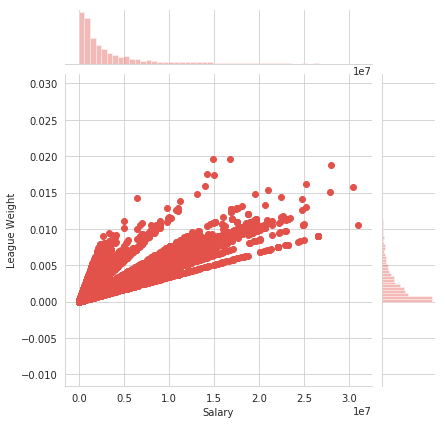

In [51]:
sns.jointplot(x='Salary', y='League Weight', data=data['player_stats'])

This may seem silly at first to plot league weight with salary because they basically are explaining the same thing, mainly, the amount of money a player is getting relative to the rest of the league. However, looking at this plot, we can see why the Salary variable might not be the best predictor variable. The near straight lines that can be inferred from the plot show that League Weight and Salary are almost perfectly correlated, but because of inflation and other time-related factors, the salary amount that would give a player a league weight of 0.01 in one year might give another player (or the same player) a completely different league weight in another year.

The time value of money is powerful and could really mess up our analysis if we're not careful.

**For now, we should focus on predicting the League Weight variable.**

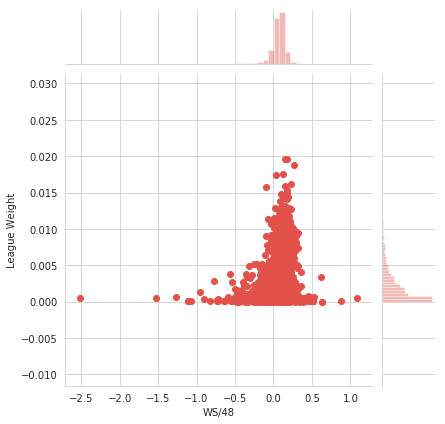

In [52]:
# Comparing win shares per 48 minutes with league weight

sns.jointplot(x='WS/48', y='League Weight', data=data['player_stats'])

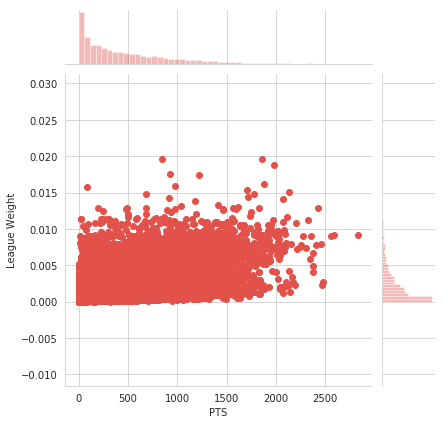

In [53]:
# Comparing total points with league weight

sns.jointplot(x='PTS', y='League Weight', data=data['player_stats'])

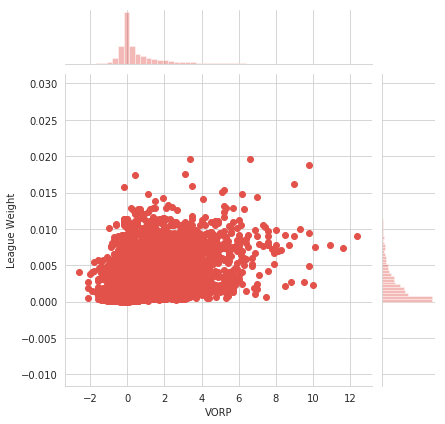

In [54]:
# Comparing VORP with League Weight

sns.jointplot(x='VORP', y='League Weight', data=data['player_stats'])

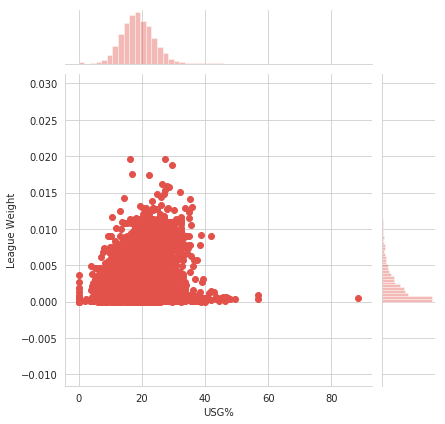

In [55]:
# Comparing USG% with League Weight

sns.jointplot(x='USG%', y='League Weight', data=data['player_stats'])

In [56]:
# Here is a strange outlier

data['player_stats'][data['player_stats']['USG%'] == data['player_stats']['USG%'].max()]

,Year,Player,Pos,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary,Team,Team Payroll,Total NBA Payroll,Player Leverage,League Weight,Team Market Size,US Region,C,C-PF,C-SF,PF,PF-C,PF-SF,PG,PG-SF,PG-SG,SF,SF-PF,SF-SG,SG,SG-PF,SG-PG,SG-SF,Midwest,Northeast,South,West
8227,1999,Gheorghe Muresan,C,27.0,1.0,1.0,-90.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,88.3,-0.1,0.0,-0.1,-2.519,-73.8,-12.9,-86.7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,475000.0,Brooklyn Nets,43735000.0,884280346.0,0.010861,0.000537,0.049458,Northeast,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
# Getting rid of this outlier
data['player_stats'] = data['player_stats'].drop(8227)

## Predictive Model Building

Let's get to the best part, the machine learning algorithms!

For this set of data, trying to predict a continuous variable, it might be best to use multiple regression, though we could also use decision trees or random forest.

### Train Test Split

Let's split the data into training and testing data

In [0]:
from sklearn.model_selection import train_test_split

In [138]:
# The predictor variable is 'League Weight', and since League Weight is calculated from salary and the related variables, I'll remove the salary-related variables

colnames = list(data['player_stats']) 

colnames.remove('Player')
colnames.remove('Pos')
colnames.remove('US Region')
colnames.remove('Salary')
colnames.remove('League Weight')
colnames.remove('Total NBA Payroll')
colnames.remove('Team Payroll')
colnames.remove('Team')
colnames.remove('Player Leverage')
print(colnames)

['Year', 'Age', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Team Market Size', 'C', 'C-PF', 'C-SF', 'PF', 'PF-C', 'PF-SF', 'PG', 'PG-SF', 'PG-SG', 'SF', 'SF-PF', 'SF-SG', 'SG', 'SG-PF', 'SG-PG', 'SG-SF', 'Midwest', 'Northeast', 'South', 'West', 'Atlanta Hawks', 'Boston Celtic', 'Brooklyn Nets', 'Charlotte Hornets', 'Chicago Bulls', 'Cleveland Caveliers', 'Dallas Mavericks', 'Denver Nuggets', 'Detroit Pistons', 'Golden State Warriors', 'Houston Rockets', 'Indiana Pacers', 'Los Angeles Clippers', 'Los Angeles Lakers', 'Memphis Grizzlies', 'Miami Heat', 'Milwaukee Bucks', 'Minnesota Timberwolves', 'New Orleans Pelicans', 'New York Knicks', 'Oklahoma City Thunder', 'Orlando Magic', 'Philadelphia 76ers', 'Phoenix Suns', 'Por

In [0]:
# Here we are trying to predict the league weight of the players

y = data['player_stats']['League Weight']
X = data['player_stats'][colnames]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Regression

Let's start simple for our predictive model and just use linear regression. It may be the most basic algorithm, but sometimes simple yields the best results.



In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lm = LinearRegression()

In [143]:
lm.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [144]:
# Let's take a look at our coefficients 
# WARNING: There will be a LOT

print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-9.76196723e-06  1.43166403e-04 -2.64390026e-05  4.19292331e-07
  2.12258418e-05 -1.88291841e-03 -9.55093847e-04 -8.77880545e-05
 -1.59768298e-04 -6.93171104e-05  1.99109563e-04 -1.17344177e-06
 -8.17010630e-05 -1.80942460e-06  1.17897051e-05  4.37056348e-05
  1.96517774e-05  1.10987216e-04  1.44281082e-04 -6.16291358e-03
  6.42692933e-06 -1.42960208e-04  2.53857634e-04 -1.08495475e-04
 -6.50561141e-07  3.83614624e-06  1.57296898e-03  1.02855293e-06
  1.47232144e-06  1.43869664e-04 -1.67911392e-06  2.36382517e-06
  2.46382150e-04 -1.88369418e-03 -3.64164256e-06  5.96844272e-06
  5.58805374e-04 -2.01733987e-06  2.09068974e-06  7.33498099e-08
  5.06220100e-07 -7.55834650e-06  5.40796711e-06  4.28476785e-06
 -1.51730935e-06  1.41398721e-04 -3.91421179e-06  3.37786450e-02
  4.51545419e-04  5.39689181e-04 -1.25295136e-04 -1.51730936e-06
  1.41398721e-04  4.23909759e-04  4.74776774e-04 -4.96687322e-04
  5.47522097e-18 -1.77256372e-04 -4.36823580e-05 -4.40738770e-05
 -3.53845

In [145]:
# Which variable had the biggest impact on our model?
import numpy as np

highest = np.argmax(lm.coef_)
value = np.amax(lm.coef_)
print(value)


var = colnames[highest]
print(var)

0.033778644988993016
C


Now this is interesting! Something seemingly unimportant like what position a player plays can actually have a pretty big impact! 

Just the position of center has a coefficient of more than 3%! (Of course, this is based on the linear regression model so it might not be fully accurate)

### Predicting Test Data for Regression

Let's see how our model performed!

In [0]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

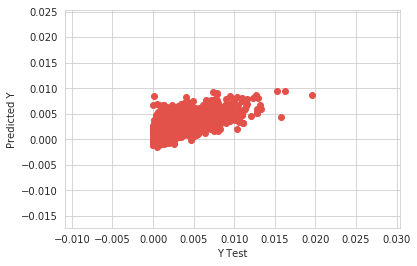

In [147]:
# Here we'll plot our predictions versus the actual values

plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### Evaluation of Regression Model

Let's get some concrete numbers on the performance of our model. We'll use the metrics: mean absolute error, mean squared error, and root mean squared error. 

Later we'll compare these numbers between all of the algorithms we use in this project.

In [148]:
from sklearn import metrics


print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.001208361245470979
MSE: 2.773862781586042e-06
RMSE: 0.0016654917536829902


### Decision Tree Model

Though decision trees are mainly used for categorical data because the structure of it allows for either distinctions for non-continuous data, it can still be used here. Let's see how it stacks up!

In [0]:
from sklearn.tree import DecisionTreeRegressor

In [0]:
dtree = DecisionTreeRegressor()

In [151]:
dtree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

### Evaluation of Decision Tree Model

In [157]:
dt_predictions = dtree.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, dt_predictions))
print('MSE:', metrics.mean_squared_error(y_test, dt_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dt_predictions)))

MAE: 0.001450260763597658
MSE: 5.0184572230247925e-06
RMSE: 0.0022401913362533996


### Random Forest Model

In [0]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

In [161]:
rfr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

### Evaluation of Random Forest Model

In [162]:
rfr_predictions = rfr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, rfr_predictions))
print('MSE:', metrics.mean_squared_error(y_test, rfr_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_predictions)))

MAE: 0.0011275359959120699
MSE: 2.6443290638954636e-06
RMSE: 0.001626139312573023


## Comparison of Models

We have three models: linear regression, decision trees, and random forests. Let's compare all of the numbers to see which ones are most accurate.

In [163]:
print('Linear Regression: ' )
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('\n')

print('Decision Tree Model: ' )
print('MAE:', metrics.mean_absolute_error(y_test, dt_predictions))
print('MSE:', metrics.mean_squared_error(y_test, dt_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dt_predictions)))
print('\n')

print('Random Forest Model: ')
print('MAE:', metrics.mean_absolute_error(y_test, rfr_predictions))
print('MSE:', metrics.mean_squared_error(y_test, rfr_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_predictions)))

Linear Regression: 
MAE: 0.0011196114995213812
MSE: 2.5965861294595025e-06
RMSE: 0.0016113926056239374


Decision Tree Model: 
MAE: 0.001450260763597658
MSE: 5.0184572230247925e-06
RMSE: 0.0022401913362533996


Random Forest Model: 
MAE: 0.0011275359959120699
MSE: 2.6443290638954636e-06
RMSE: 0.001626139312573023


Based on these numbers, it looks like linear regression actually did the best! Like I mentioned before, sometimes the simplest method leads to the best results. 

*NOTE: I didn't do any tuning of the hyperparameters for the decision tree and random forest models so perhaps I didn't get the optimal models for them. Feel free to tune the models to improve them!*

# Potential Improvements

Finally, we've covered the entire basic data science workflow by simply hunting down an answer for a simple yet difficult question to answer: what factors determine who gets paid a higher NBA salary? 

This process was quite extensive, and thus, there is much room for improvement. With this project, I've prepared a template for any of you to improve upon and yield even better results than I did. Here are a few things (not comprehensive) that could be improved:


### 1. Dealing with the time value of money more effectively

Because of the fact that the value of money changed over time, I knew that I couldn't compare salaries from the 1990s to the salaries of players today. Instead of converting the numbers to a single adjusted number, I opted to created a metric called League Weight that would make all of the player salaries relative to one another in terms of who has a greater proportion of the total payroll. Maybe this wasn't the best way to deal with the problem. Feel free to find a better way to adjust the salary numbers.

### 2. Getting more over-arching data

I only used data from 1990 to the present because any salary data and advanced statistics were sparse and difficult to find for the years earlier. Before 1979 there wasn't even a 3-point line! Nonetheless, for people who are less impatient than me, don't be afraid to look for more historic data that might allow for a more comprehensive analysis of the salary data of NBA history.

### 3. Adding more features

I used a LOT of variables in this project, but the significance of the variables to the final outcome definitely differed a lot. There are many other advanced stats in the NBA that I didn't use that others could add. 

### 4. Using more machine learning algorithms

I only used three machine learning algorithms, and all of them were pretty simple. I considered using neural networks but that would have required a lot of hyperparameter tuning. 

### 5. Fine-tuning the algorithms already used

Even amongst the few algorithms I used in this project, for decision trees and random forests, I could definitely have tuned the models to make them more effective. 